In [16]:
from sklearn.datasets import load_breast_cancer 

cancer = load_breast_cancer()

# malignant:悪性　benign:良性　に分ける

In [17]:
malignant = cancer.data[cancer.target == 0]

benign   = cancer.data[cancer.target == 1]

In [18]:
import pandas as pd 
import numpy as np 
import numpy.random as random 
import scipy as sp

import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

%precision 3

'%.3f'

In [27]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

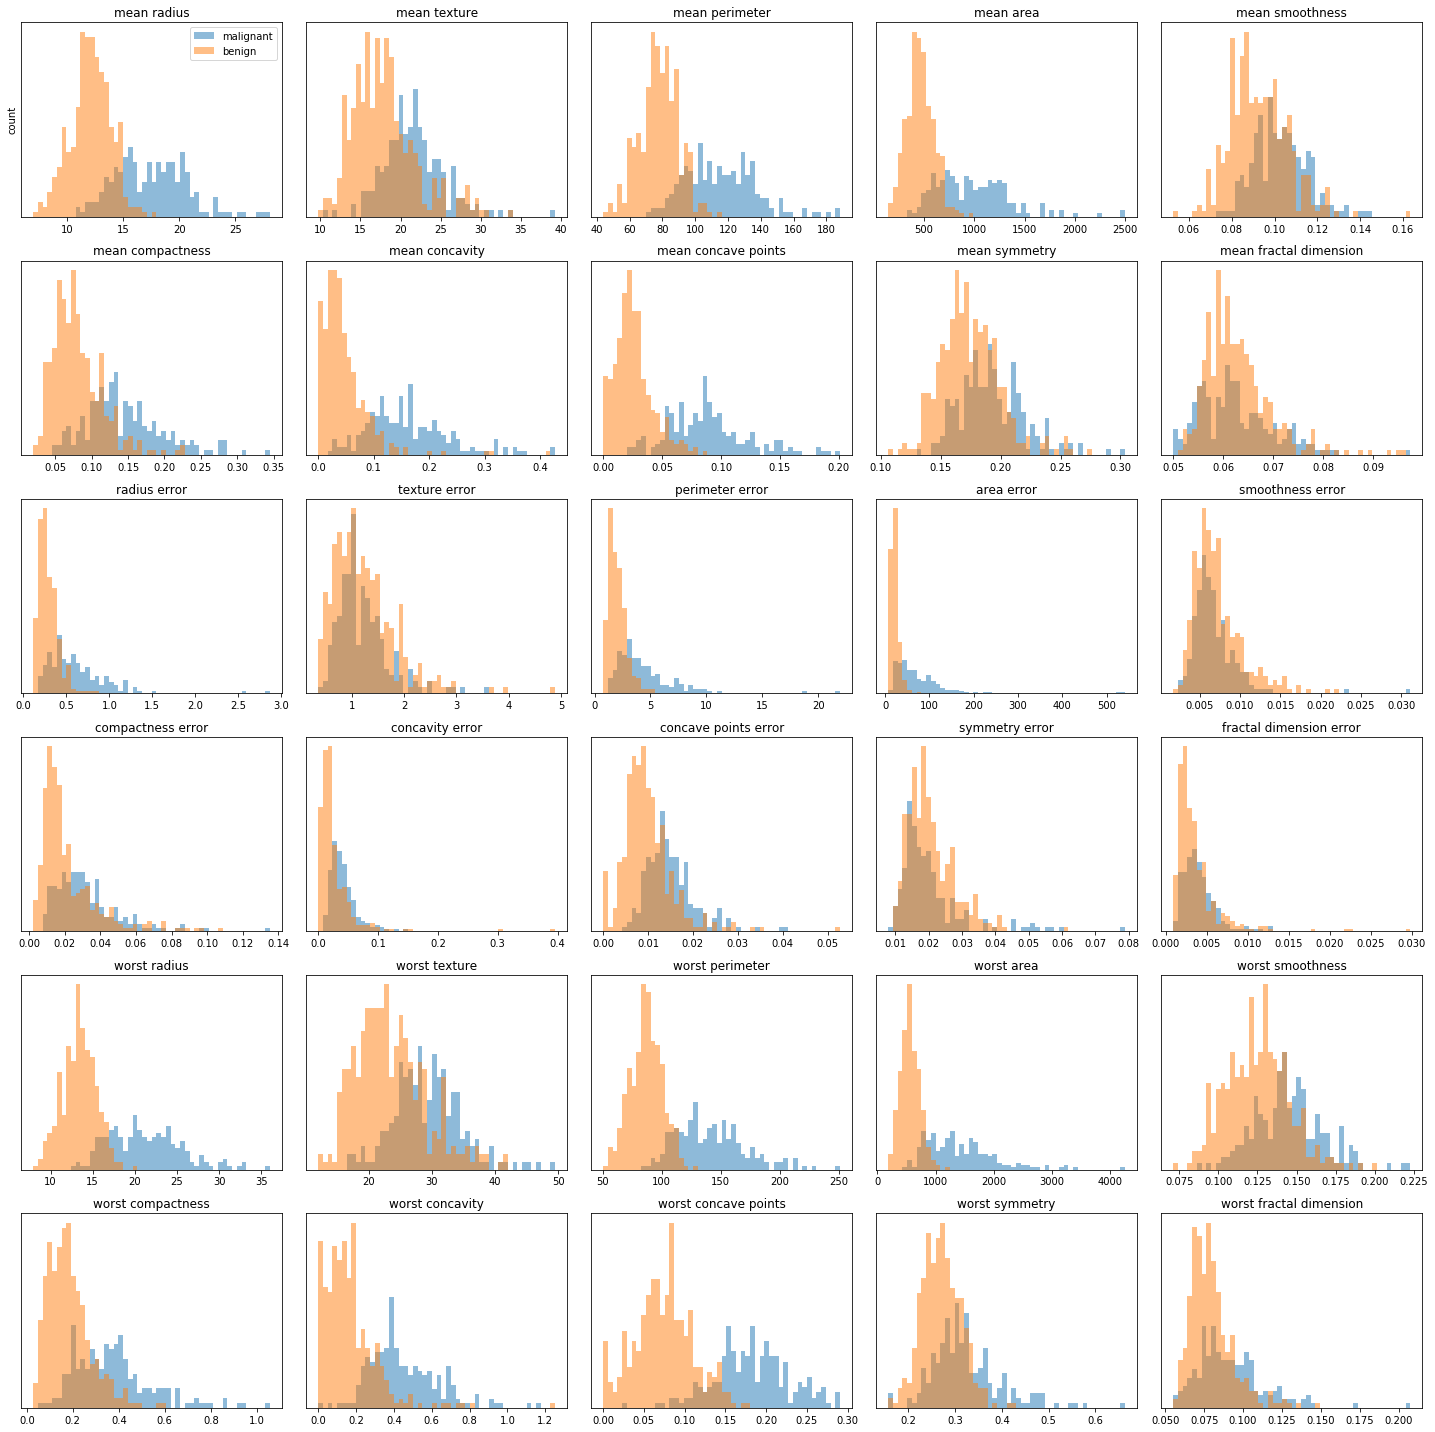

In [19]:
fig,axes = plt.subplots(6,5,figsize = (20,20))

ax = axes.ravel()

for i in range(30):
    _,bins =np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins,alpha=.5)
    ax[i].hist(benign[:,i],bins,alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
#ラベルの設定
ax[0].set_ylabel('count')
ax[0].legend(['malignant','benign'],loc='best')
fig.tight_layout()

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

#標準化　
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)

#主成分分析
pca = PCA(n_components = 2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

#表示
print(X_pca.shape)
print(pca.explained_variance_ratio_)

(569, 2)
[0.443 0.19 ]


In [23]:
#次元を低くしたデータを可視化する
X_pca = pd.DataFrame(X_pca,columns=['pc1','pc2'])

#上のデータに目的変数(cancer.target)を紐づける、横に結合する
X_pca = pd.concat([X_pca,pd.DataFrame(cancer.target,columns=['target'])],axis=1)

pca_malignant=X_pca[X_pca['target']==0]
pca_benign=X_pca[X_pca['target']==1]

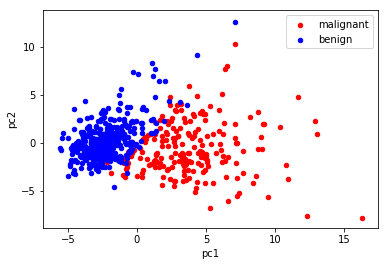

In [24]:
#悪性をプロット
ax = pca_malignant.plot.scatter(x='pc1',y='pc2',color='red',label='malignant');

#良性をプロット
ax = pca_benign.plot.scatter(x='pc1',y='pc2',color='blue',label='benign',ax=ax)